<a href="https://colab.research.google.com/github/Nayeongseo/ML1-TeamProject-2/blob/main/%EB%A8%B8%EB%9F%AC2%EC%B0%A8%ED%8C%80%ED%94%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import welch
import scipy.signal as signal
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE

# train data의 input과 label 추출

In [15]:
train_path = np.load('train.npy', allow_pickle='TRUE')

In [16]:
print(f"Value: {train_path}")

Value: {'input': array([[[[  3.80859375,  -2.63671875, -10.64453125, ...,  -6.39648438,
           -2.34375   ,  -7.56835938],
         [  3.66210938,  -2.49023438,  -8.0078125 , ...,  -4.15039062,
           -2.39257812,  -7.66601562],
         [  2.9296875 ,  -5.22460938, -12.45117188, ...,  -7.2265625 ,
           -4.6875    , -10.88867188],
         ...,
         [  2.97851562,  -7.91015625,  -9.375     , ...,  -7.421875  ,
           -7.47070312, -15.57617188],
         [  4.73632812,  -6.93359375,  -8.93554688, ...,  -5.95703125,
           -5.61523438, -12.3046875 ],
         [  1.5625    ,  -9.22851562,  -9.08203125, ...,  -4.19921875,
           -5.76171875, -12.98828125]]],


       [[[ -6.20117188,   1.51367188,   4.00390625, ...,  -3.36914062,
           -8.83789062,  -9.91210938],
         [-10.44921875,  -5.61523438,   0.83007812, ...,  -9.1796875 ,
          -12.109375  , -14.11132812],
         [ -6.68945312,   0.53710938,   4.58984375, ...,  -5.859375  ,
          -10.

In [17]:
# train_path에서 'input'과 'label' 데이터 추출
train_input = train_path.item()['input']
train_label = train_path.item()['label']

# 'input' 데이터의 형태 확인
print("Shape of 'input' data:", train_input.shape)

# 'input' 데이터를 4차원 배열로 변환
num_samples = train_input.shape[0]  # 샘플 수
num_channels = 1  # 채널 수 (EEG 데이터의 경우 채널이 하나이므로 1)
num_time_steps = train_input.shape[2]  # 시간 단계 수
num_features = train_input.shape[3]  # 특징 수

# 4차원 배열을 생성하여 데이터 복사
train_input_4d = np.zeros((num_samples, num_channels, num_time_steps, num_features))
for i in range(num_samples):
    train_input_4d[i, 0, :, :] = train_input[i, 0, :, :]

# 변환된 'input' 데이터의 형태 확인
print("Shape of 'input' data (4D):", train_input_4d.shape)

# 'label' 데이터의 형태 확인
print("Shape of 'label' data:", train_label.shape)

Shape of 'input' data: (4608, 1, 22, 1125)
Shape of 'input' data (4D): (4608, 1, 22, 1125)
Shape of 'label' data: (4608, 4)


In [ ]:
print(train_input_4d)

[[[[  3.80859375  -2.63671875 -10.64453125 ...  -6.39648438
     -2.34375     -7.56835938]
   [  3.66210938  -2.49023438  -8.0078125  ...  -4.15039062
     -2.39257812  -7.66601562]
   [  2.9296875   -5.22460938 -12.45117188 ...  -7.2265625
     -4.6875     -10.88867188]
   ...
   [  2.97851562  -7.91015625  -9.375      ...  -7.421875
     -7.47070312 -15.57617188]
   [  4.73632812  -6.93359375  -8.93554688 ...  -5.95703125
     -5.61523438 -12.3046875 ]
   [  1.5625      -9.22851562  -9.08203125 ...  -4.19921875
     -5.76171875 -12.98828125]]]


 [[[ -6.20117188   1.51367188   4.00390625 ...  -3.36914062
     -8.83789062  -9.91210938]
   [-10.44921875  -5.61523438   0.83007812 ...  -9.1796875
    -12.109375   -14.11132812]
   [ -6.68945312   0.53710938   4.58984375 ...  -5.859375
    -10.9375     -10.9375    ]
   ...
   [  9.1796875   12.45117188  17.72460938 ...   3.07617188
     -1.66015625  -4.98046875]
   [  9.13085938  13.33007812  16.74804688 ...   7.03125
      2.1484375   -0.

In [18]:
train_input_3d = train_input_4d.squeeze()
print(train_input_3d.shape)

(4608, 22, 1125)


# test data의 input 추출

In [2]:
test_path = np.load('test.npy', allow_pickle='TRUE')

In [11]:
# 'input' 데이터만 추출하여 test 데이터 생성
test_4d = test_path.item().get('input')

# test 데이터의 형태 확인
print("Shape of 'test' data:", test_4d.shape)

Shape of 'test' data: (576, 1, 22, 1125)


In [12]:
print(test_4d)

[[[[ -4.4921875   -5.859375     1.7578125  ...   9.03320312
      8.64257812   4.8828125 ]
   [ -3.515625    -5.37109375  -2.05078125 ...   7.56835938
      9.765625     5.51757812]
   [ -1.46484375  -5.078125     2.09960938 ...   7.2265625
      6.8359375    2.78320312]
   ...
   [  4.24804688   1.02539062   7.37304688 ...   3.80859375
      2.78320312   0.92773438]
   [  5.81054688   2.29492188   9.03320312 ...   4.24804688
      2.97851562   0.43945312]
   [  5.95703125   1.26953125  10.05859375 ...   4.296875
      3.85742188   1.31835938]]]


 [[[  0.43945312   5.41992188   5.02929688 ...  12.54882812
     11.86523438  13.42773438]
   [ -1.07421875   4.8828125    4.19921875 ...  13.0859375
      8.984375    12.20703125]
   [ -1.46484375   3.56445312   2.24609375 ...  12.3046875
     11.37695312  13.91601562]
   ...
   [-10.10742188  -1.46484375  -5.51757812 ...   3.75976562
      2.68554688   6.73828125]
   [ -9.765625    -3.36914062  -8.34960938 ...   3.07617188
      2.39257812 

In [14]:
test = test_4d.squeeze()
print(test.shape)

(576, 22, 1125)


# 데이터 전처리

Bandpass Filter

In [10]:
lowcut = 0.1
highcut = 30.0
fs = 250.0

def butter_bandpass(lowcut, hightcut, fs, order = 5):
  nyquist = 0.5*fs
  low = lowcut/nyquist
  high = highcut/nyquist
  b, a = signal.butter(order, [low, high], btype = 'band')
  return b, a

def bandpass_filter(data, lowcut, highcut, fs, order = 5):
  b, a = butter_bandpass(lowcut, highcut, fs, order = order)
  y = signal.filtfilt(b, a, data, axis = -1)
  return y

In [21]:
train_input_filtered = np.zeros_like(train_input_3d)
for i in range(train_input_3d.shape[0]):
  for j in range(train_input_3d.shape[1]):
    train_input_filtered[i, j, :] = bandpass_filter(train_input_3d[i, j, :], lowcut, highcut, fs)

test_filtered = np.zeros_like(test)
for i in range(test.shape[0]):
  for j in range(test.shape[1]):
    test_filtered[i, j, :] = bandpass_filter(test[i, j, :], lowcut, highcut, fs)

In [22]:
print(f'Train input filtered shape: {train_input_filtered.shape}')
print(f'Test filtered shape: {test_filtered.shape}')

Train input filtered shape: (4608, 22, 1125)
Test filtered shape: (576, 22, 1125)


PSD

In [25]:
def scale_datasets(train_data, test_data):
    # 채널 수에 맞는 StandardScaler 객체 리스트 생성
    scalers = [StandardScaler() for _ in range(train_data.shape[1])]

    # Train 데이터에 대해 채널별로 fit 및 transform 수행
    scaled_train_data = np.zeros_like(train_data)
    for i in range(train_data.shape[1]):
        # 채널별 데이터 추출 (모든 예시, 특정 채널, 모든 시간)
        channel_data = train_data[:, i, :].reshape(-1, train_data.shape[2])
        # fit_transform을 사용하여 scaling 후 원래 모양으로 변환
        scaled_train_data[:, i, :] = scalers[i].fit_transform(channel_data).reshape(-1, train_data.shape[2])

    # Test 데이터에 대해 채널별로 transform 수행 (fit은 수행하지 않음)
    scaled_test_data = np.zeros_like(test_data)
    for i in range(test_data.shape[1]):
        # 채널별 데이터 추출
        channel_data = test_data[:, i, :].reshape(-1, test_data.shape[2])
        # transform을 사용하여 scaling 후 원래 모양으로 변환
        scaled_test_data[:, i, :] = scalers[i].transform(channel_data).reshape(-1, test_data.shape[2])

    return scaled_train_data, scaled_test_data

In [26]:
scaled_train_data, scaled_test_data = scale_datasets(train_input_filtered, test_filtered)

print("Scaled Train Data Shape:", scaled_train_data.shape)
print("Scaled Test Data Shape:", scaled_test_data.shape)

Scaled Train Data Shape: (4608, 22, 1125)
Scaled Test Data Shape: (576, 22, 1125)


# 모델

Random Forest

In [29]:
# 트레이닝 데이터의 형태를 (4608, 22*1125)로 변환
X = scaled_train_data.reshape(scaled_train_data.shape[0], -1)

# 레이블 데이터 준비 (예시에서는 최대값 인덱스를 클래스 레이블로 사용)
# 실제 사용 시 레이블 데이터 형태에 맞게 조정 필요
y = np.argmax(train_label, axis=1)

# 랜덤 포레스트 모델 생성
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 5-겹 교차 검증 수행
cv_scores = cross_val_score(rf, X, y, cv=5)

# 교차 검증 결과 출력
print("교차 검증 정확도 점수: ", cv_scores)
print("평균 정확도: {:.4f}".format(np.mean(cv_scores)))

교차 검증 정확도 점수:  [0.3329718  0.3329718  0.329718   0.33984799 0.30076004]
평균 정확도: 0.3273


In [30]:
# 트레이닝 데이터의 형태를 변경
X_train = scaled_train_data.reshape(scaled_train_data.shape[0], -1)
y_train = np.argmax(train_label, axis=1)

# 테스트 데이터의 형태를 변경
X_test = scaled_test_data.reshape(scaled_test_data.shape[0], -1)

# 랜덤 포레스트 모델 생성 및 트레이닝 데이터에 대해 학습
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
predictions = rf.predict(X_test)

# 예측 결과를 pandas DataFrame으로 변환
results_df = pd.DataFrame({
    'ID': range(len(predictions)),
    'TARGET': predictions
})

# 결과를 CSV 파일로 저장
results_df.to_csv('submissions.csv', index=False)

print("예측 결과가 'submissions.csv' 파일로 저장되었습니다.")

예측 결과가 'submissions.csv' 파일로 저장되었습니다.


# TSNE

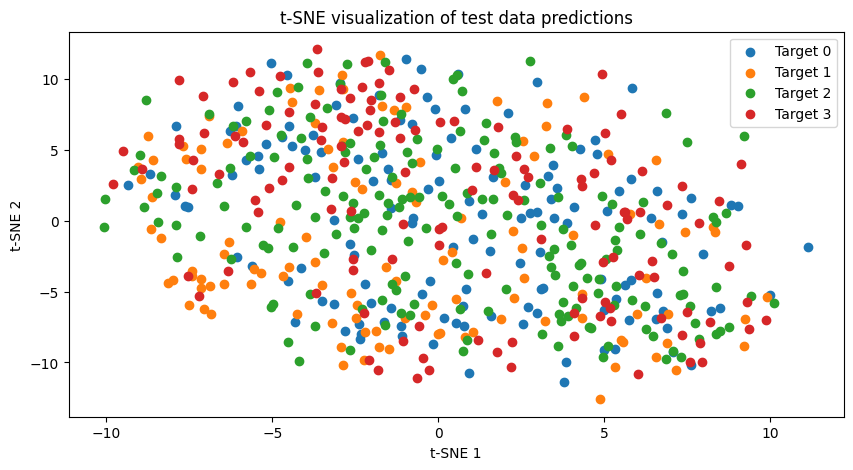

In [33]:
# TSNE 모델 생성 및 변환 수행
tsne = TSNE(n_components=2, random_state=42)
X_test_tsne = tsne.fit_transform(X_test)

# 시각화
plt.figure(figsize=(10, 5))

# 예측 결과에 따라 색을 다르게 하여 점을 그림
for target in np.unique(predictions):
    indices = np.where(predictions == target)
    plt.scatter(X_test_tsne[indices, 0], X_test_tsne[indices, 1], label=f'Target {target}')

plt.legend()
plt.title('t-SNE visualization of test data predictions')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()